<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 07** | Python: Programação Orientada a Objetos
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>from / import / as;</li>
  <li>Módulo;</li>
  <li>Pacote;</li>
  <li>Baixando pacotes.</li>
</ol>

---

# **Exercícios**

## 0\. Preparação do ambiente

Neste exercício vamos utilizar a base de dados de ações da bolsa de valores dos EUA, a Dow Jones. Os dados estão disponíveis para *download* neste [link](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index). Vamos utilizar o pacote `wget` para fazer o *download* dos dados.

 - Instalando o pacote `wget` na versão 3.2.

In [ ]:
!pip install wget==3.2

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=f304c15238c85ee39c2d7c7375cce39ad4999dff9f2bf814cb0f2fd1753ea721
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


 - Fazendo o download dos dados no arquivo compactado `dados.zip`.

In [ ]:
import wget

wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip')

'./dados.zip'

 - Descompactando os `dados` na pasta dados com o pacote nativo `zipfile`.

In [ ]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

Verifique a pasta dados criada, ela deve conter dois arquivos:

 - **dow_jones_index.data**: um arquivo com os dados;
 - **dow_jones_index.names**: um arquivo com a descrição completa dos dados.

É possível observar que o arquivo de dados é um arquivo separado por virgulas, o famoso `csv`. Vamos renomear o arquivo de dados para que ele tenha a extensão `csv` com o pacote nativo `os`.

- Renomeando o arquivo com o pacote nativo `os`.

In [ ]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

Pronto! Abra o arquivo e o Google Colab irá apresentar uma visualização bem legal dos dados.

---

## 1\. Pandas

Para processar os dados, vamos utilizar o pacote `pandas` na versão `1.1.5`. A documentação completa por ser encontrada neste [link](https://pandas.pydata.org/docs/)

In [ ]:
!pip install pandas==1.1.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.3 MB/s eta 0:00:00
ERROR: Operation cancelled by user


Vamos importar o pacote com o apelido (alias) `pd`.

In [ ]:
import pandas as pd

Estamos prontos para ler o arquivo.

In [ ]:
df = pd.read_csv('./dados/dow_jones_index.csv')

O pandas trabalha com o conceito de dataframe, uma estrutura de dados com muitos métodos e atributos que aceleram o processamento de dados. Alguns exemplos:

 - Visualizando as `n` primeiras linhas:

In [ ]:
df.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


 - Visualizando o nome das colunas:

In [ ]:
df.columns.to_list()

['quarter',
 'stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

 - Verificando o número de linhas e colunas.

In [ ]:
linhas, colunas = df.shape
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

Número de linhas: 750
Número de colunas: 16


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações do McDonalds, listado na Dow Jones como MCD:

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `MCD`.

In [ ]:
df_mcd = df.loc[df['stock'] == 'MCD']
display(df_mcd)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
216,1,MCD,1/7/2011,$77.10,$77.59,$73.59,$74.37,85400677,-3.540860,NaN,NaN,$74.25,$74.06,-0.255892,49,0.820223
217,1,MCD,1/14/2011,$74.25,$74.49,$72.46,$74.06,44895850,-0.255892,-47.429164,85400677.0,$74.65,$75.01,0.482251,42,0.823656
218,1,MCD,1/21/2011,$74.65,$75.75,$74.31,$75.01,40056497,0.482251,-10.779065,44895850.0,$74.25,$73.28,-1.306400,35,0.813225
219,1,MCD,1/28/2011,$74.25,$75.85,$73.05,$73.28,46734907,-1.306400,16.672476,40056497.0,$73.80,$74.05,0.338753,28,0.832424
220,1,MCD,2/4/2011,$73.80,$74.50,$73.08,$74.05,41519549,0.338753,-11.159449,46734907.0,$74.13,$76.14,2.711450,21,0.823768
221,1,MCD,2/11/2011,$74.13,$76.32,$73.30,$76.14,39363816,2.711450,-5.192092,41519549.0,$76.07,$76.13,0.078875,14,0.801156
222,1,MCD,2/18/2011,$76.07,$76.45,$75.70,$76.13,16734140,0.078875,-57.488522,39363816.0,$75.95,$74.44,-1.988150,7,0.801261
223,1,MCD,2/25/2011,$75.95,$76.45,$74.42,$74.44,27881213,-1.988150,66.612763,16734140.0,$74.51,$76.03,2.039990,0,0.819452
224,1,MCD,3/4/2011,$74.51,$76.63,$73.64,$76.03,41047787,2.039990,47.223821,27881213.0,$76.38,$76.73,0.458235,84,0.802315
225,1,MCD,3/11/2011,$76.38,$77.25,$74.97,$76.73,34855064,0.458235,-15.086618,41047787.0,$76.10,$72.99,-4.086730,77,0.794995


 - Selecionando apenas as colunas de data e valores de ações.

In [ ]:
df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]
# ou tambem poderia fazer o seguinte:
# df_mcd = df.loc[df['stock'] == 'MCD', ['date', 'open', 'high', 'low', 'close']]
display(df_mcd)


,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [ ]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


In [ ]:
df_mcd.dtypes

date     object
open     object
high     object
low      object
close    object
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [ ]:
for col in ['open', 'high', 'low', 'close']:
  df_mcd[col] = df_mcd[col].apply(lambda value: float(value.split(sep='$')[-1]))

Verifique novamente os dados e seus tipos.

In [ ]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,77.10,77.59,73.59,74.37
217,1/14/2011,74.25,74.49,72.46,74.06
218,1/21/2011,74.65,75.75,74.31,75.01
219,1/28/2011,74.25,75.85,73.05,73.28
220,2/4/2011,73.80,74.50,73.08,74.05
221,2/11/2011,74.13,76.32,73.30,76.14
222,2/18/2011,76.07,76.45,75.70,76.13
223,2/25/2011,75.95,76.45,74.42,74.44
224,3/4/2011,74.51,76.63,73.64,76.03
225,3/11/2011,76.38,77.25,74.97,76.73


In [ ]:
df_mcd.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.

**Agora é a sua vez!** Conduza o mesmo processo para extrair e tratar os dados da empresa Coca-Cola (`stock` column igual a `KO`).

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `KO`.

In [ ]:
# extração e tratamento dos dados da empresa Coca-Cola.
df_ko = df.loc[df['stock'] == 'KO']
display(df_ko)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
204,1,KO,1/7/2011,$65.88,$65.88,$62.56,$62.92,59802189,-4.493020,NaN,NaN,$62.70,$63.13,0.685805,63,0.746980
205,1,KO,1/14/2011,$62.70,$63.86,$62.56,$63.13,31297830,0.685805,-47.664407,59802189.0,$63.21,$62.77,-0.696092,56,0.744496
206,1,KO,1/21/2011,$63.21,$63.92,$62.72,$62.77,36000586,-0.696092,15.025821,31297830.0,$62.87,$62.21,-1.049790,49,0.748765
207,1,KO,1/28/2011,$62.87,$63.31,$62.14,$62.21,42141599,-1.049790,17.058092,36000586.0,$62.32,$62.56,0.385109,42,0.755506
208,1,KO,2/4/2011,$62.32,$63.48,$61.89,$62.56,34863226,0.385109,-17.271231,42141599.0,$62.67,$63.57,1.436090,35,0.751279
209,1,KO,2/11/2011,$62.67,$64.75,$62.32,$63.57,46269528,1.436090,32.717288,34863226.0,$63.67,$64.55,1.382130,28,0.739342
210,1,KO,2/18/2011,$63.67,$64.72,$62.55,$64.55,29937386,1.382130,-35.297836,46269528.0,$63.36,$64.31,1.499370,21,0.728118
211,1,KO,2/25/2011,$63.36,$64.40,$63.33,$64.31,32331825,1.499370,7.998157,29937386.0,$64.17,$65.21,1.620690,14,0.730835
212,1,KO,3/4/2011,$64.17,$65.87,$63.86,$65.21,61665987,1.620690,90.728445,32331825.0,$65.32,$64.81,-0.780772,7,0.720748
213,1,KO,3/11/2011,$65.32,$65.84,$64.47,$64.81,44560041,-0.780772,-27.739678,61665987.0,$64.34,$62.70,-2.548960,0,0.725197


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações da empresa Coca-Cola, listado na Dow Jones como KO:

 - Selecionando apenas as colunas de data e valores de ações.

In [ ]:
df_ko = df_ko[['open', 'close', 'high', 'low', 'date']]
df_ko1 = df_ko[['open', 'close', 'high', 'low']]



In [ ]:
for col in ['open', 'close', 'high', 'low']:
  df_ko[col] = df_ko[col].apply(lambda value: float(value.split(sep='$')[-1]))

<ipython-input-29-07465d2a9afe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ko[col] = df_ko[col].apply(lambda value: float(value.split(sep='$')[-1]))


Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [ ]:
# Visualize os dados do dataframe
display(df_ko1)

,open,close,high,low
204,$65.88,$62.92,$65.88,$62.56
205,$62.70,$63.13,$63.86,$62.56
206,$63.21,$62.77,$63.92,$62.72
207,$62.87,$62.21,$63.31,$62.14
208,$62.32,$62.56,$63.48,$61.89
209,$62.67,$63.57,$64.75,$62.32
210,$63.67,$64.55,$64.72,$62.55
211,$63.36,$64.31,$64.40,$63.33
212,$64.17,$65.21,$65.87,$63.86
213,$65.32,$64.81,$65.84,$64.47


In [ ]:
# Verifique o tipo dos dados
tipo_dos_dados = df_ko1.dtypes
display(tipo_dos_dados)

open     object
close    object
high     object
low      object
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [ ]:
for col in ['open', 'close', 'high', 'low']:
  df_ko1[col] = df_ko1[col].apply(lambda value: float(value.split(sep='$')[-1]))


<ipython-input-32-b975bac4abe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ko1[col] = df_ko1[col].apply(lambda value: float(value.split(sep='$')[-1]))


Verifique novamente os dados e seus tipos.

In [ ]:
# Visualize novamente os dados do dataframe
display(df_ko1)

,open,close,high,low
204,65.88,62.92,65.88,62.56
205,62.70,63.13,63.86,62.56
206,63.21,62.77,63.92,62.72
207,62.87,62.21,63.31,62.14
208,62.32,62.56,63.48,61.89
209,62.67,63.57,64.75,62.32
210,63.67,64.55,64.72,62.55
211,63.36,64.31,64.40,63.33
212,64.17,65.21,65.87,63.86
213,65.32,64.81,65.84,64.47


In [ ]:
# Verifique novamente o tipo dos dados
df_ko1.dtypes

open     float64
close    float64
high     float64
low      float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.

---

## 2\. Seaborn

Para visualizar os dados, vamos utilizar o pacote `seaborn` na versão `0.11.1`. A documentação completa por ser encontrada neste [link](https://seaborn.pydata.org/)

In [ ]:
!pip install seaborn==0.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


Vamos importar o pacote com o apelido (alias) `sns`.

In [ ]:
import seaborn as sns

Vamos visualizar os valores de abertura das ações ao longo do tempo.

<ipython-input-45-533bf4eae097>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


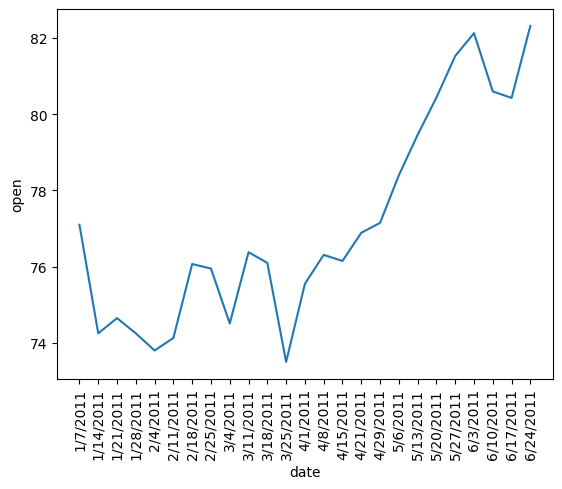

In [ ]:
plot = sns.lineplot(x="date", y="open", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

<ipython-input-49-1af5daa54bb0>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


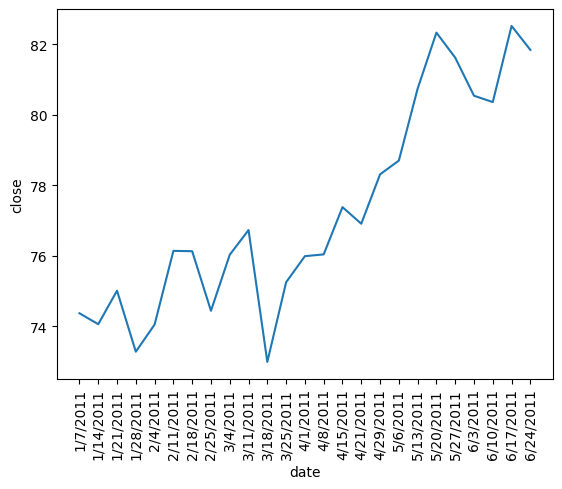

In [ ]:
plot = sns.lineplot(x="date", y="close", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

<ipython-input-58-754274876e32>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


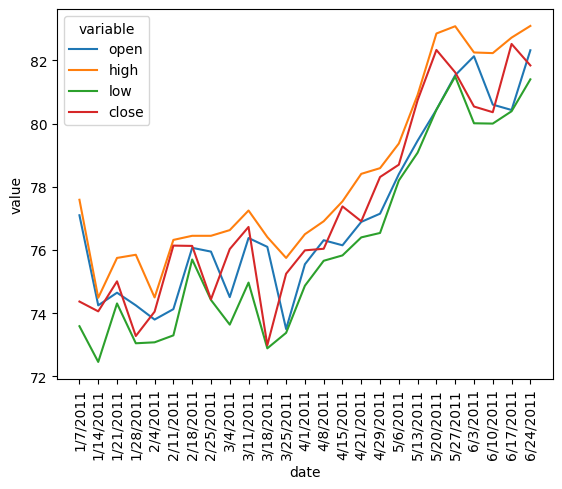

In [ ]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date']))
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para finalizar, vamos salvar o gráfico numa figura.

In [ ]:
plot.figure.savefig("./mcd.png")

**Agora é a sua vez,** faça o gráfico acima para a empresa Coca-Cola e salve a imagem com o nome `ko.png`.

In [ ]:
# visualização dos dados da Coca-Cola.
display(df_ko)

,open,close,high,low,date
204,65.88,62.92,65.88,62.56,1/7/2011
205,62.70,63.13,63.86,62.56,1/14/2011
206,63.21,62.77,63.92,62.72,1/21/2011
207,62.87,62.21,63.31,62.14,1/28/2011
208,62.32,62.56,63.48,61.89,2/4/2011
209,62.67,63.57,64.75,62.32,2/11/2011
210,63.67,64.55,64.72,62.55,2/18/2011
211,63.36,64.31,64.40,63.33,2/25/2011
212,64.17,65.21,65.87,63.86,3/4/2011
213,65.32,64.81,65.84,64.47,3/11/2011


Vamos visualizar os valores de abertura das ações ao longo do tempo.

<ipython-input-61-ca1ecadbd518>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot_ko_data_open.set_xticklabels(labels=df_ko['date'], rotation=90)


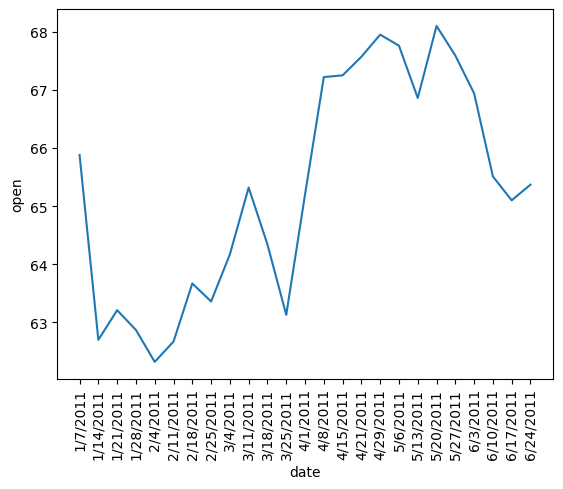

In [ ]:
plot_ko_data_open = sns.lineplot(data = df_ko, x='date', y= 'open')
_ = plot_ko_data_open.set_xticklabels(labels=df_ko['date'], rotation=90)

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

<ipython-input-62-7dae59bbe934>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot_ko_data_close.set_xticklabels(labels=df_ko['date'], rotation = 90)


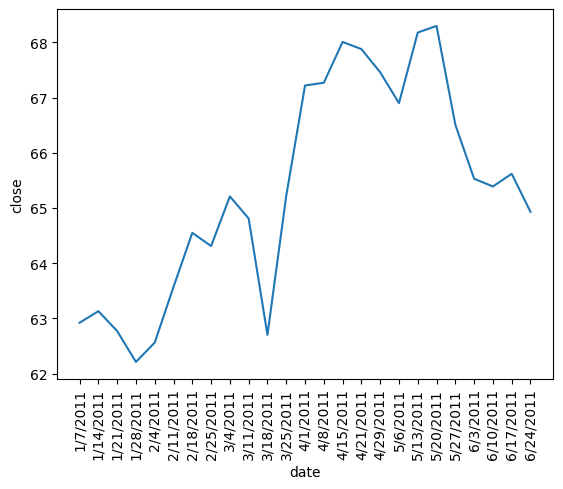

In [ ]:
plot_ko_data_close = sns.lineplot(data = df_ko, x='date', y= 'close')
_ = plot_ko_data_close.set_xticklabels(labels=df_ko['date'], rotation = 90)


Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

<ipython-input-63-2f46d142af3b>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot_ko_data_close_open_high_low.set_xticklabels(labels=df_ko['date'], rotation = 90)


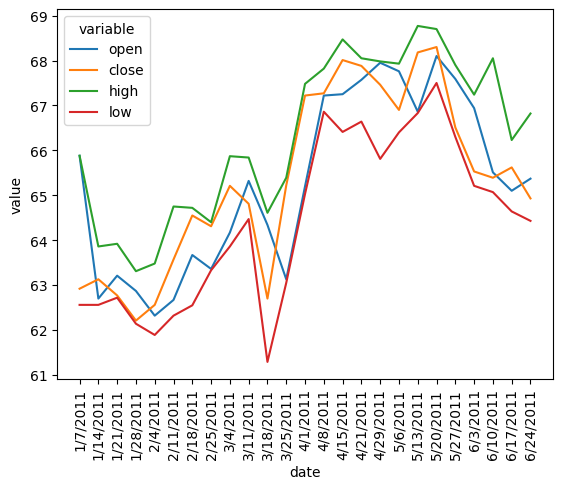

In [ ]:
df_ko_melted = pd.melt(df_ko, ['date'])
plot_ko_data_close_open_high_low = sns.lineplot( x = 'date', y = 'value', hue = 'variable', data = pd.melt(df_ko, ['date']))
_ = plot_ko_data_close_open_high_low.set_xticklabels(labels=df_ko['date'], rotation = 90)

Para finalizar, vamos salvar o gráfico numa figura.

In [ ]:
plot_ko_data_close_open_high_low.figure.savefig("ko.png")

Analise as duas imagens e escreva pelo menos um *insight* que você consegue extrair dos dados. Fique a vontade para escrever quantos *insights* você quiser.

Obs: *Insights* são observações sobre o que você percebe/entende/interpreta em suas análises. No caso deste exercício, você vai analisar os dados dos gráficos da empresa McDonalds e da empresa Cola-Cola e notar o que os dados gerados podem ser interessante, que tipo de interpretação o comportamento dos dados estão te trazendo.

**Insight #1**: **McDonalds:**

Em relação ao preço da abertura das ações da McDonalds, pode-se afirmar que a maior queda foi do dia 7/1 ao dia 14/1, e a maior alta foi do dia 29/4 ao dia 3/6

Quanto ao preço de fechamento, obteve-se a maior alta do dia 6/5 ao dia 20/5, e maior baixa do dia 7/1 ao dia 14/1.

O maior valor máximo das ações da McDonalds foi na casa de aproximadamente 82,5, no dia 27/5, e o menor valor maximo de aproximadamente $74,5, no dia 14/1.

o maior valor mínimo das ações da McDonalds foi na casa dos 81,5 no dia 27/5, e o menor foi na casa dos 72,5, no dia 14/1.

Logo, percebe-se que o mês de janeiro e março foram caracterizados por grandes baixas no preço das ações, e o mês de maio/junho por grandes altas.


**Insight #2**: **Coca-Cola**

Em relação ao preço da abertura das ações da Coca-Cola, pode-se afirmar que a maior queda foi do dia 7/1 ao dia 14/1, e a maior alta foi do dia 25/3 ao dia 1/4

Quanto ao preço de fechamento, obteve-se a maior alta do dia 18/3 ao dia 25/3, e maior baixa do dia 20/5 ao dia 3/6.

O maior valor máximo das ações da Coca-Cola foi na casa de aproximadamente $69, no dia 13/5, e o menor valor máximo de aproximadamente 63,5, no dia 28/1.

o maior valor mínimo das ações da Coca-Cola foi na casa de aprox 67 no dia 20/5, e o menor foi na casa dos 61, no dia 18/3.


Portanto, observa-se que o mês de janeiro foi caracterizado pelas maiores baixas, o mês de maio pelas maiores altas, e o mês de março o mais turbulento, tendo altas e baixas.


---